# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Данные находятся в трёх файлах:
- gold_recovery_train.csv — обучающая выборка;
- gold_recovery_test.csv — тестовая выборка;
- gold_recovery_full.csv — исходные данные.

<p>Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.</p>
<p>Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.</p>
<p>В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.</p>

#### Подготовьте данные

- Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.
- Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
- Проведите предобработку данных.

#### Проанализируйте данные

- Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
- Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
- Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

#### Постройте модель

- Напишите функцию для вычисления итоговой sMAPE.
- Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('gold_recovery_train.csv')
test = pd.read_csv('gold_recovery_test.csv')
full = pd.read_csv('gold_recovery_full.csv')

In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [4]:
full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [6]:
test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [8]:
train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Проверим правильность расчета эффективности обогащения.

In [9]:
rougher_output_recovery = ((train['rougher.output.concentrate_au'] * (train['rougher.input.feed_au'] - 
         train['rougher.output.tail_au'])) / (train['rougher.input.feed_au'] * 
        (train['rougher.output.concentrate_au'] - train['rougher.output.tail_au']))) * 100

In [10]:
recovery = pd.concat([train['rougher.output.recovery'], rougher_output_recovery], axis=1)
recovery.columns = ['recovery_1', 'recovery_2']
recovery = recovery.dropna()
mean_absolute_error(recovery['recovery_1'], recovery['recovery_2'])

9.444891926100695e-15

Как видим MAE у нас получилось настолько незначительная, что ее можно не учитывать. Рассчеты rougher.output.recovery правильны.

In [11]:
full_columns = full.columns
test_columns = test.columns

In [12]:
test_columns_not = []
for i in range(0, len(full_columns)):
    r=0
    for j in range(0, len(test_columns)):
        if full_columns[i] == test_columns[j]:
            r=1
    if r==0:
        test_columns_not.append(full_columns[i])

In [13]:
test_columns_not

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Все эти признаки недоступны в тестовой выборке и они относятся к параметрам продукта и расчетным характеристакам. Целевые признаки: 
rougher.output.recovery - эффективность обогащения чернового концентрата, 
final.output.recovery - эффективность обогащения финального концентрата. 
Для их расчета нам нужно предсказать признаки:
rougher.output.concentrate_au - доля золота в концентрате после флотации, 
rougher.output.tail_au - доля золота в отвальных хвостах после флотации,
final.output.concentrate_au - доля золота в концентрате после очистки, 
final.output.tail_au - доля золота в отвальных хвостах после очистки.
Остальные признаки нам не нужны. 

Я думаю легче предсказывать непосредственные показатели, тем то, что считается из этих показателей. 

Переведем признак date из строки в дату и время

In [14]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')

Заменим все пропуски значением из предыдущей строки.

In [15]:
full = full.fillna(method='backfill', axis='index')
train = train.fillna(method='backfill', axis='index')
test = test.fillna(method='backfill', axis='index')

# 2. Анализ данных

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Распределение концентрации металла Au на разных стадиях')

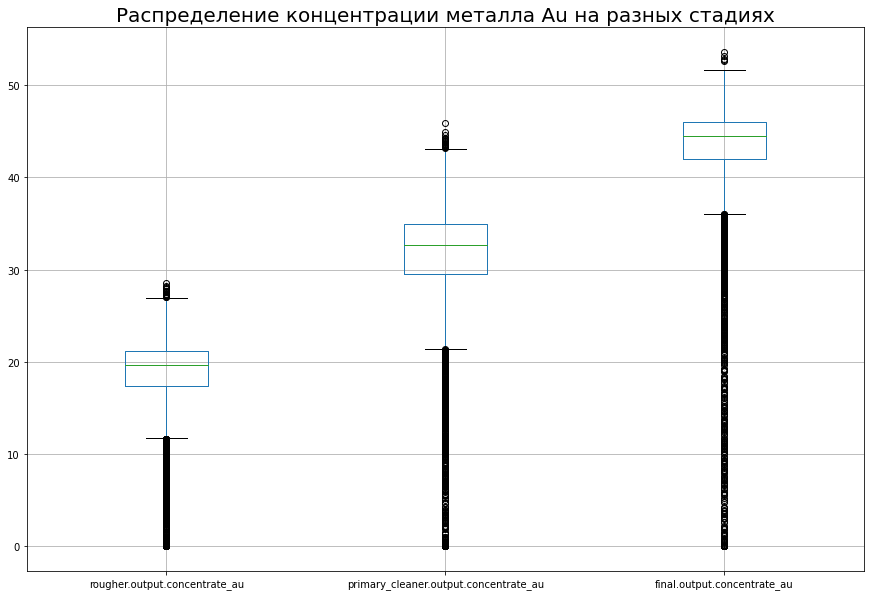

In [16]:
plt.figure(figsize=(15,10))
train.boxplot(['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au','final.output.concentrate_au'])
plt.title('Распределение концентрации металла Au на разных стадиях', fontsize=20)
plt.grid(True)
plt.show()

Концентрация Au повышается. 

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Распределение концентрации металла Ag на разных стадиях')

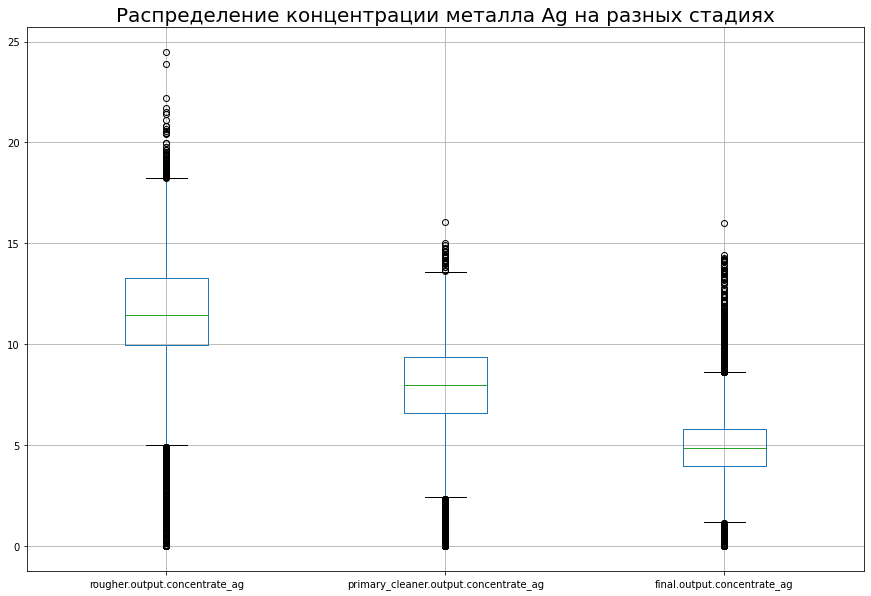

In [17]:
plt.figure(figsize=(15,10))
train.boxplot(['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag'])
plt.title('Распределение концентрации металла Ag на разных стадиях', fontsize=20)
plt.grid(True)
plt.show()

Как видим концентрация Ag уменьшается.

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Распределение концентрации металла Pb на разных стадиях')

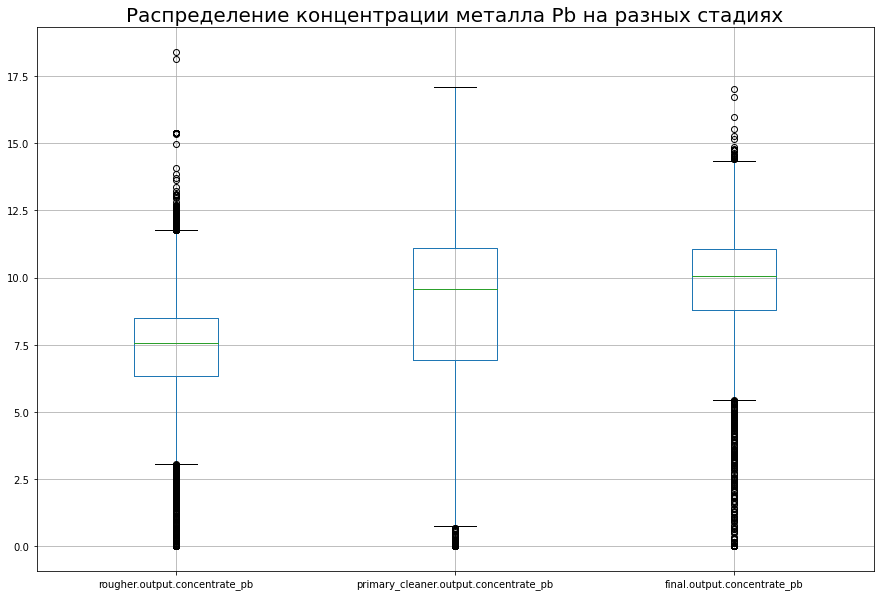

In [18]:
plt.figure(figsize=(15,10))
train.boxplot(['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb'])
plt.title('Распределение концентрации металла Pb на разных стадиях', fontsize=20)
plt.grid(True)
plt.show()

Контцентрация Pb повышается.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

In [19]:
train['primary_cleaner.input.feed_size'].quantile(0.01)

5.849999904632568

In [20]:
train['primary_cleaner.input.feed_size'].quantile(0.99)

8.720000267028809

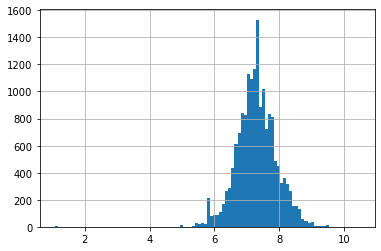

In [21]:
train['primary_cleaner.input.feed_size'].hist(bins=100)

In [22]:
test['primary_cleaner.input.feed_size'].quantile(0.01)

5.860000133514402

In [23]:
test['primary_cleaner.input.feed_size'].quantile(0.99)

8.699999809265138

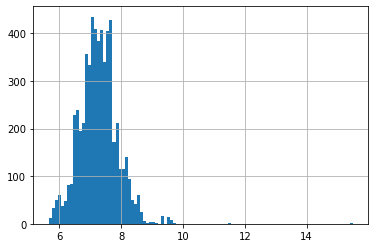

In [24]:
test['primary_cleaner.input.feed_size'].hist(bins=100)

Распределения не сильно отличаются друг от друга, оценка модели будет правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях.

In [25]:
train['final.output.concentrate_sum'] = train['final.output.concentrate_ag'] + train['final.output.concentrate_pb'] + train['final.output.concentrate_sol'] + train['final.output.concentrate_au']
train['primary_cleaner.output.concentrate_sum'] = train['primary_cleaner.output.concentrate_ag'] + train['primary_cleaner.output.concentrate_pb'] + train['primary_cleaner.output.concentrate_sol'] + train['primary_cleaner.output.concentrate_au']
train['rougher.output.concentrate_sum'] = train['rougher.output.concentrate_ag'] + train['rougher.output.concentrate_pb'] + train['rougher.output.concentrate_sol'] + train['rougher.output.concentrate_au']
train['rougher.input.feed_sum'] = train['rougher.input.feed_ag'] + train['rougher.input.feed_pb'] + train['rougher.input.feed_sol'] + train['rougher.input.feed_au']

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Распределение концентрации всех веществ на разных стадиях')

Text(0, 0.5, 'Распределение концентрации всех веществ')

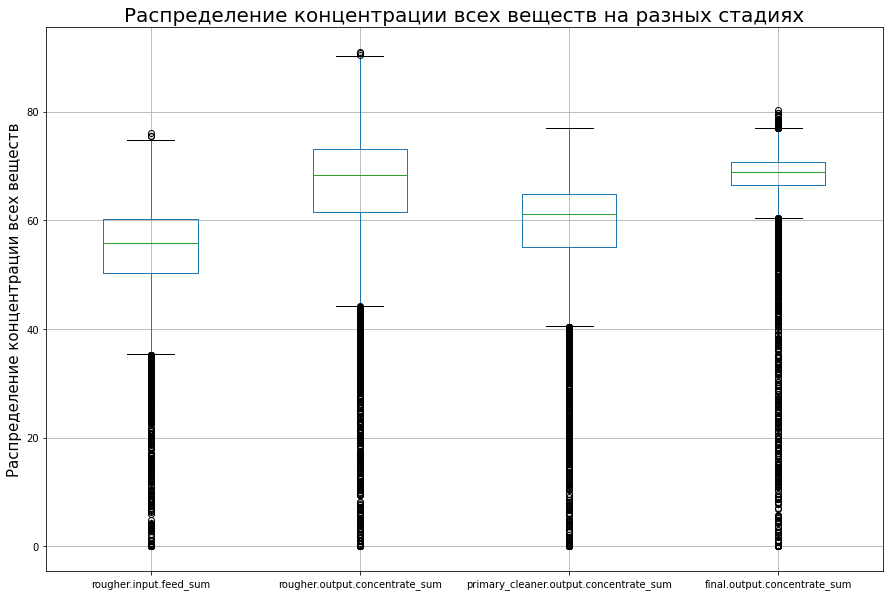

In [26]:
plt.figure(figsize=(15,10))
train.boxplot(['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum'])
plt.title('Распределение концентрации всех веществ на разных стадиях', fontsize=20)
plt.ylabel('Распределение концентрации всех веществ', fontsize=15)
plt.grid(True)
plt.show()

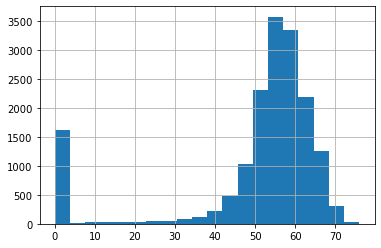

In [27]:
train['rougher.input.feed_sum'].hist(bins=20)

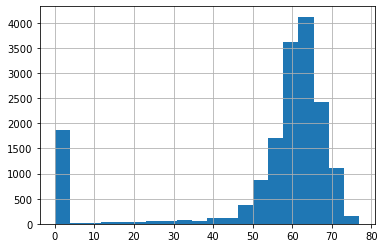

In [28]:
train['primary_cleaner.output.concentrate_sum'].hist(bins=20)

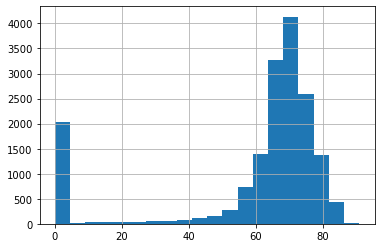

In [29]:
train['rougher.output.concentrate_sum'].hist(bins=20)

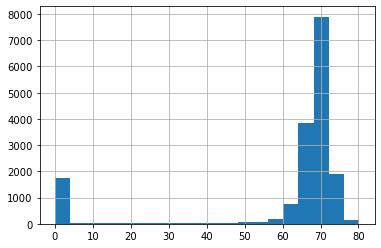

In [30]:
train['final.output.concentrate_sum'].hist(bins=20)

In [31]:
test['rougher.input.feed_sum'] = test['rougher.input.feed_ag'] + test['rougher.input.feed_pb'] + test['rougher.input.feed_sol'] + test['rougher.input.feed_au']

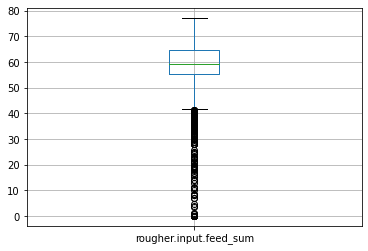

In [32]:
test.boxplot(['rougher.input.feed_sum'])

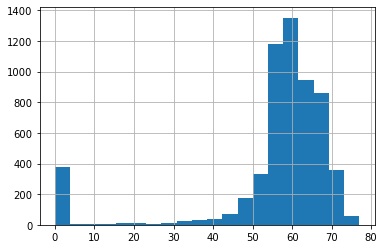

In [33]:
test['rougher.input.feed_sum'].hist(bins=20)

Аномальные значения в суммарном распределении есть. Думаю взять 95% доверительный интервал.

У распределении тяжелый хвост слева. Отбросим аномально низкие значения. В остальном распределения выглядят как нормальные. 

In [34]:
lower = train['final.output.concentrate_sum'].quantile(0.025)
train = train.loc[train['final.output.concentrate_sum'] > lower]
lower = train['primary_cleaner.output.concentrate_sum'].quantile(0.025)
train = train.loc[train['primary_cleaner.output.concentrate_sum'] > lower]
lower = train['rougher.output.concentrate_sum'].quantile(0.025)
train = train.loc[train['rougher.output.concentrate_sum'] > lower]
lower = train['rougher.input.feed_sum'].quantile(0.025)
train = train.loc[train['rougher.input.feed_sum'] > lower]
lower = test['rougher.input.feed_sum'].quantile(0.025)
test = test.loc[test['rougher.input.feed_sum'] > lower]

In [35]:
test = test.drop(['rougher.input.feed_sum'], axis=1)
train = train.drop(['final.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'rougher.output.concentrate_sum', 'rougher.input.feed_sum'], axis=1)

Подготовим данные для обучения. Из обучающей выборки feature_train удалим все столбцы, которых нет в тестовой. В target_train будут все целевые признаки.

In [36]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [37]:
rougher_output_recovery_mean = train['rougher.output.recovery'].mean()
final_output_recovery_mean = train['final.output.recovery'].mean()

In [38]:
feature_train = train.drop(test_columns_not, axis=1)
feature_train = feature_train.drop(['date'], axis=1)
target_train = train.loc[:,['rougher.output.concentrate_au', 'rougher.output.tail_au', 'final.output.concentrate_au', 'final.output.tail_au']]

In [39]:
rougher_input_feed_au = test['rougher.input.feed_au']

Для теста нам понадобится target_test c такими же признаками, как и target_train. Возьмем их из таблицы full.

In [40]:
test_index = test['date']
full_target = full.loc[:,['date', 'rougher.output.recovery', 'final.output.recovery']]

In [41]:
target_test = full_target.merge(test_index, on='date', how='right')
target_test = target_test.drop(['date'], axis=1)
target_test = target_test.reset_index(drop=True)

In [42]:
test = test.drop(['date'], axis=1)

Стандартизируем данные.

In [43]:
numeric = feature_train.columns
scaler = StandardScaler()
scaler.fit(feature_train[numeric])
feature_train.loc[:, numeric] = scaler.transform(feature_train[numeric])
test.loc[:, numeric] = scaler.transform(test[numeric])

StandardScaler()

# 3. Модель

Функция для подсчета эффективности обогащения.

In [44]:
def calculation_of_efficiency(predictions):
    predictions = pd.DataFrame(predictions)
    predictions.columns = ['rougher.output.concentrate_au','rougher.output.tail_au', 'final.output.concentrate_au', 'final.output.tail_au']
    rougher_output_recovery = ((predictions['rougher.output.concentrate_au'] * (rougher_input_feed_au - 
         predictions['rougher.output.tail_au'])) / (rougher_input_feed_au * 
        (predictions['rougher.output.concentrate_au'] - predictions['rougher.output.tail_au']))) * 100
    final_output_recovery = ((predictions['final.output.concentrate_au'] * (rougher_input_feed_au - 
         predictions['final.output.tail_au'])) / (rougher_input_feed_au * 
        (predictions['final.output.concentrate_au'] - predictions['final.output.tail_au']))) * 100
    data = pd.concat([rougher_output_recovery, final_output_recovery], axis=1)
    data.columns = ['rougher.output.recovery', 'final.output.recovery']
    return data

Функция для вычисления sMAPE.

In [45]:
def smape(target, predictions):
    N = len(predictions)
    sum = 0 
    for i in range(0, N):
        sum += ((abs(target[i] - predictions[i])) / ((abs(target[i]) + abs(predictions[i])) / 2)) * 100
    return sum / N

Функция для вычисления итоговой sMAPE.

In [46]:
def smape_result(target, predictions):
    predictions = calculation_of_efficiency(predictions)
    return 0.25 * smape(target['rougher.output.recovery'], predictions['rougher.output.recovery'])  + 0.75 * smape(target['final.output.recovery'], predictions['final.output.recovery'])

In [47]:
def my_scorer(estimator, X, y):
    x = estimator.predict(X)
    return mean_absolute_error(y, x)

Оценим качество наших моделей кросс-валидацией.

In [48]:
mae_= 1000
depth_ = 0
for depth in range(1, 11):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    mae = pd.Series(cross_val_score(model, feature_train, target_train, scoring=my_scorer, cv=3)).mean()
    if mae < mae_:
        mae_ = mae
        depth_ = depth
print('depth:', depth_, 'mae', mae_)

depth: 1 mae 1.5854693775653173


In [49]:
mae_= 1000
n_estimators_ = 0
depth_ = 0
for n_estimators in range(10, 101, 10):
    model = RandomForestRegressor(n_estimators = n_estimators, random_state=12345)
    mae = pd.Series(cross_val_score(model, feature_train, target_train, scoring=my_scorer, cv=3)).mean()
    print(mae)
    if mae < mae_:
        mae_ = mae
        n_estimators_ = n_estimators
print('n_estimators:', n_estimators_, 'mae', mae_)

2.0079879395172897
2.0363449766308097
2.010508443293294
1.998641300218875
1.98637495677891
1.9926493773942617
1.9941263956902728
1.9814542634736239
1.980747693797375
1.9883473737585515
n_estimators: 90 mae 1.980747693797375


depth: 1 split: 2 leaf: 1 mae 1.5854693775653173

In [50]:
model = LinearRegression()
pd.Series(cross_val_score(model, feature_train, target_train, scoring=my_scorer, cv=3)).mean()

1.912869374449904

Проверим модели на тестовой выборке.

In [51]:
model_1 = DecisionTreeRegressor(max_depth=1, random_state=12345)
model_1.fit(feature_train, target_train)
predictions = model_1.predict(test)
smape_result(target_test, predictions)

DecisionTreeRegressor(max_depth=1, random_state=12345)

12.478067629590136

In [52]:
model_2 = RandomForestRegressor(n_estimators = 90, random_state=12345)
model_2.fit(feature_train, target_train)
predictions = model_2.predict(test)
smape_result(target_test, predictions)

RandomForestRegressor(n_estimators=90, random_state=12345)

11.10912212993488

In [53]:
model_3 = LinearRegression()
model_3.fit(feature_train, target_train)
predictions = model_3.predict(test)
smape_result(target_test, predictions)

LinearRegression()

10.35076066978465

In [54]:
def smape_result1(target, predictions):
    return 0.25 * smape(target['rougher.output.recovery'], predictions['rougher.output.recovery'])  + 0.75 * smape(target['final.output.recovery'], predictions['final.output.recovery'])

In [55]:
const = pd.DataFrame([[rougher_output_recovery_mean, final_output_recovery_mean] for i in range(0, 5485)], columns=['rougher.output.recovery', 'final.output.recovery'])

In [56]:
smape_result1(target_test, const)

11.074069158234133

sMAPE различается в несколько десятых. Наверное это не плохой результат)